In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x=np.linspace(-1,6,141)

In [3]:
plot_y=(plot_x-2.5)**2-1

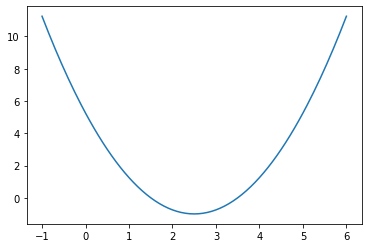

In [4]:
plt.plot(plot_x,plot_y)

In [5]:
def dJ(theta):
    return 2*(theta-2.5)

In [6]:
def J(theta):
    return (theta-2.5)**2-1

In [7]:
eta=0.1
theta=0.0
epsilon=1e-8
theta_history=[theta]

2.499891109642585
-0.99999998814289


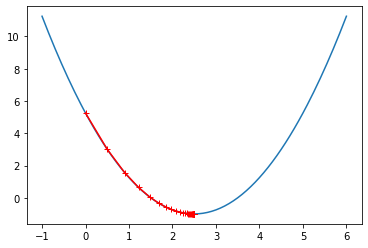

In [8]:
while True:
    gradient = dJ(theta)
    last_theta=theta
    theta=theta-eta*gradient
    theta_history.append(theta)
    if(abs(J(theta)-J(last_theta))<epsilon):
        break
print(theta)
print(J(theta))
plt.plot(plot_x,J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='+')

In [9]:
len(theta_history)

46

In [10]:
X=2*np.random.random(size=100)
y=X*3.+4.+np.random.normal(size=100)

In [11]:
X=X.reshape(-1,1)

In [12]:
X.shape

(100, 1)

In [13]:
y.shape

(100,)

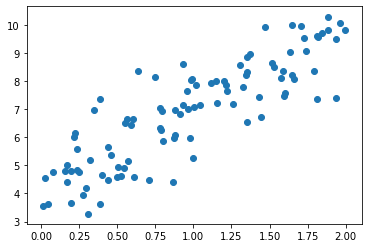

In [14]:
plt.scatter(X,y)

### 梯度下降法训练

In [15]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [16]:
def dJ(theta,X_b,y):
    res = np.empty(len(theta))
    res[0]=np.sum(X_b.dot(theta)-y)
    for i in range(1,len(theta)):
        res[i]=(X_b.dot(theta)-y).dot(X_b[:,i])
    return res*2/len(X_b)

In [17]:
def grandient_descent(X_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta=initial_theta
    i_iter=0
    theta_history.append(initial_theta)
    
    while i_iter<n_iters:
        gradient=dJ(theta,X_b,y)
        last_theta=theta
        theta=theta-eta-gradient
        
        if(abs(J(theta,X_b,y)-J(last_theta,X_b,y))<epsilon):
            break
        i_iter+=1
    return theta

In [18]:
X_b=np.hstack([np.ones((len(X),1)),X])

In [19]:
initial_theta=np.zeros(X_b.shape[1])

In [20]:
eta=0.01
grandient_descent(X_b,y,initial_theta,eta)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


array([nan, nan])

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
standarScaler=StandardScaler()
standarScaler.fit(X_train)

NameError: name 'X_train' is not defined


### 随机梯度下降法

In [23]:
m=100000
x=np.random.normal(size=m)
X=x.reshape(-1,1)
y=4.*x+np.random.normal(0,3,size=m)

In [24]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(y)
    except:
        return float('inf')

In [25]:
def dJ(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(y)
    except:
        return float('inf')

In [26]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e8):
    theta=initial_theta
    cur_iter=0
    while cur_iter < n_iters:
        gradient=dJ(theta,X_b,y)
        last_theta=theta
        theta=theta-eta*gradient
        if(abs(J(theta,X_b,y)-J(last_theta,X_b,y))<epsilon):
            break
        cur_iter+=1
    return theta

In [28]:
%%time
X_b=np.hstack([np.ones((len(X),1)),X])
initial_theta=np.zeros(X_b.shape[1])
eta=0.01
theta=gradient_descent(X_b,y,initial_theta,eta)


CPU times: user 10.3 ms, sys: 2.42 ms, total: 12.7 ms
Wall time: 8.31 ms


In [29]:
theta


array([-0.24821957, -0.24821957])

### 随机梯度下降

In [39]:
def dJ_sgd(theta,X_b_i,y_i):
    return X_b_i.T.dot(X_b_i.dot(theta)-y_i)*2.

In [40]:
def sgd(X_b,y,initial_theta,n_iters):
    t0=5
    t1=50
    
    def learning_rate(t):
        return t0/(t+t1)
    theta=initial_theta
    for cur_iter in range(n_iters):
        rand_i=np.random.randint(len(X_b))
        grandient=dJ_sgd(theta,X_b[rand_i],y[rand_i])
        theta=theta-learning_rate(cur_iter)*gradient
    return theta

In [41]:
%%time
X_b=np.hstack([np.ones((len(X),1)),X])
initial_theta=np.zeros(X_b.shape[1])
theta=sgd(X_b,y,initial_theta,n_iters=len(X_b)//3)

CPU times: user 401 ms, sys: 1.76 ms, total: 402 ms
Wall time: 405 ms


In [42]:
theta

array([0.00886612, 0.00886612])

In [43]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg=SGDRegressor()
%time sgd_reg.fit()